# Depression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.plotting.register_matplotlib_converters()
sns.set_style(style='darkgrid')
import sklearn

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

<br>

## Understanding the Data

In [4]:
train.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [5]:
train.shape

(140700, 20)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [7]:
train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


Seems `Academic Pressure`, `Work Pressure`, `Study Satisfaction`, `Job Satisfaction`, `Financial Stress` values contains 1-5 scale rate.

Based on my observation, the data fields we will rely on this prediction are:
- 'Sleep Duration'
- 'Dietary Habits'
- 'Have you ever had suicidal thoughts ?'
- 'Work/Study Hours'
- 'Financial Stress'
- 'Family History of Mental Illness'


And other supporting informations are:
- 'Working Professional or Student'
- 'Academic Pressure'
- 'Work Pressure'
- 'CGPA'
- 'Study Satisfaction'
- 'Job Satisfaction'

The student-related columns ('Academic Pressure', 'CGPA', 'Study Satisfaction') and the worker-related columns ('Work Pressure', 'Job Satisfaction') is missing a lot of value, suggesting that most of them only focus on work or studies only.

<br>

## Data Wrangling

In [8]:
# before wrangling, we make a copy that we can play around so we can preserve the original dataset
train_1 = train.copy()

In [9]:
train.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [10]:
# renaming the columns for easier querying
train_1.rename(columns={
    'Working Professional or Student': 'Working_Professional_or_Student',
    'Academic Pressure': 'Academic_Pressure', 
    'Work Pressure': 'Work_Pressure',
    'Study Satisfaction': 'Study_Satisfaction', 
    'Job Satisfaction': 'Job_Satisfaction', 
    'Sleep Duration': 'Sleep_Duration',
    'Dietary Habits': 'Dietary_Habits', 
    'Have you ever had suicidal thoughts ?': 'Ever_had_Suicidal_Thoughts',
    'Work/Study Hours': 'Work_or_Study_Hours', 
    'Financial Stress': 'Financial_Stress',
    'Family History of Mental Illness': 'Family_History_of_Mental_Illness'
}, inplace=True)

In [11]:
# removing unnecessarry columns
# id - value is same as data's iteration location (.iloc) and seems nothing special
# City - unnecessary to use people's geographic location as a factor in predicting whether they have depression or not, based in this situation
# `Profession` and `Degree` - `Working Professional or Student` is enough, we can be specific but it won't help our prediction after all
train_1.drop(columns=['id','City','Profession','Profession','Degree'], inplace=True)

### Student-related columns and Worker-related columns

In [12]:
train_1.Working_Professional_or_Student.value_counts()

Working_Professional_or_Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

In [13]:
# test query 1 for student-related columns and worker-related columns

# checks if there are any working students and/or working professionals go back to studying based on the fields `Academic_Pressure` and `Work_Pressure`
train_1.query('Academic_Pressure.notnull() & Work_Pressure.notnull()')

,Name,Gender,Age,Working_Professional_or_Student,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Ever_had_Suicidal_Thoughts,Work_or_Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression


In [14]:
# test query 2 for student-related columns and worker-related columns

# checks if there are any working students and/or working professionals go back to studying based on the fields `Study_Satisfaction` and `Job_Satisfaction`
train_1.query('Study_Satisfaction.notnull() & Job_Satisfaction.notnull()')

,Name,Gender,Age,Working_Professional_or_Student,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Ever_had_Suicidal_Thoughts,Work_or_Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
1428,Rishi,Male,29.0,Student,3.0,NaN,9.63,3.0,3.0,7-8 hours,Moderate,No,8.0,5.0,No,0
116703,Neil,Male,25.0,Student,4.0,NaN,9.44,5.0,2.0,Less than 5 hours,Unhealthy,Yes,4.0,1.0,No,1


The `Working_Professional_or_Student` column has values 'Working Professional' and 'Student' and no data value that suggest there are a working student or learning Professional workers. 

The `test query 1` says there are no person who is working and studying at the same time, while the `test query 2` says there are 2 working students in the dataset.

My first thought was to merge the field `Academic_Pressure` & `Work_Pressure`, `Study_Satisfaction` & `Job_Satisfaction`, and remove the `CGPA` field but since there are working students, there'll be conflicts so let's fill their null values instead with `0`, which means not applicable. As we remember, `train.describe()` query from above suggests that we have scale rate data of 1-5 on some fields.

In [15]:
# checking if we have a `0` value for fields 'Academic_Pressure','Work_Pressure','Study_Satisfaction','Job_Satisfaction','CGPA'
train_1.query('Academic_Pressure == 0 | Work_Pressure == 0 | Study_Satisfaction == 0 | Job_Satisfaction == 0 | CGPA == 0')

,Name,Gender,Age,Working_Professional_or_Student,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Ever_had_Suicidal_Thoughts,Work_or_Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression


The query above shows that fields `Academic_Pressure`,`Work_Pressure`,`Study_Satisfaction`,`Job_Satisfaction`, and `CGPA` don't even have a single `0` value. That means we can use `0` to fill null values.

In [16]:
train_2 = train_1.copy()
train_2[['Academic_Pressure','Work_Pressure','Study_Satisfaction','Job_Satisfaction','CGPA']] = train_2[['Academic_Pressure','Work_Pressure','Study_Satisfaction','Job_Satisfaction','CGPA']].fillna(value=0)

In [17]:
# notice there are 0s now on those column we edited
train_2.head()

,Name,Gender,Age,Working_Professional_or_Student,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Ever_had_Suicidal_Thoughts,Work_or_Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,Aaradhya,Female,49.0,Working Professional,0.0,5.0,0.00,0.0,2.0,More than 8 hours,Healthy,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Working Professional,0.0,4.0,0.00,0.0,3.0,Less than 5 hours,Unhealthy,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Working Professional,0.0,5.0,0.00,0.0,1.0,Less than 5 hours,Moderate,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Working Professional,0.0,1.0,0.00,0.0,1.0,5-6 hours,Unhealthy,Yes,9.0,4.0,Yes,0


In [18]:
train_2.loc[train_2.Academic_Pressure.isnull()]

,Name,Gender,Age,Working_Professional_or_Student,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Ever_had_Suicidal_Thoughts,Work_or_Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression


> for example, Academic_Pressure has no null values anymore as seen above

### Sleep Duration

In [19]:
train_2.Sleep_Duration.value_counts()

Sleep_Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hours                5
6-8 hours                4
No                       4
1-6 hours                4
10-11 hours              2
9-11 hours               2
8-9 hours                2
Sleep_Duration           2
Unhealthy                2
45                       2
40-45 hours              1
1-2 hours                1
1-3 hours                1
9-6 hours                1
55-66 hours              1
Moderate                 1
35-36 hours              1
8 hours                  1
10-6 hours               1
Indore                   1
than 5 hours             1
49 hours                 1
Work_Study_Hours         1
3-6 hours                1
45-48 hours              1
9-5                      1
Pune                     1
9-5 hours                1
Name: count, 

In [20]:
# Too many random values for `Sleep_Duration`. Let's use the top results ('Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours', '6-7 hours') instead
train_3 = train_2.copy()

train_3.drop(train_3.query("Sleep_Duration != ['Less than 5 hours', '7-8 hours', 'More than 8 hours','5-6 hours','6-7 hours']").index, inplace=True)

In [21]:
train_3.Sleep_Duration.value_counts()

Sleep_Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
6-7 hours                8
Name: count, dtype: int64

### Dietary Habits

In [22]:
train_3.Dietary_Habits.value_counts()

Dietary_Habits
Moderate             49674
Unhealthy            46205
Healthy              44723
Yes                      2
More Healthy             2
No                       2
Pratham                  1
Gender                   1
BSc                      1
Less than Healthy        1
3                        1
1.0                      1
Hormonal                 1
Electrician              1
Mihir                    1
No Healthy               1
Less Healthy             1
M.Tech                   1
Vegas                    1
Male                     1
Indoor                   1
Class 12                 1
2                        1
Name: count, dtype: int64

In [23]:
# too many distinct values, let's use the top answers and drop the rest as well
train_3.drop(train_3.query("Dietary_Habits != ['Moderate','Unhealthy','Healthy']").index, inplace=True)

### Financial Stress

In [24]:
train_3.query("Financial_Stress.isnull()")

,Name,Gender,Age,Working_Professional_or_Student,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Ever_had_Suicidal_Thoughts,Work_or_Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
22377,Manvi,Female,32.0,Student,3.0,0.0,5.64,1.0,0.0,5-6 hours,Healthy,No,12.0,NaN,No,1
51485,Ishwar,Male,37.0,Working Professional,0.0,4.0,0.00,0.0,2.0,More than 8 hours,Moderate,Yes,9.0,NaN,No,0
68910,Arav,Male,29.0,Student,2.0,0.0,8.94,3.0,0.0,Less than 5 hours,Unhealthy,No,12.0,NaN,Yes,0
97610,Pari,Female,20.0,Student,1.0,0.0,6.83,1.0,0.0,5-6 hours,Healthy,No,9.0,NaN,Yes,0


Based from the queries above, some data row has missing values for 'Financial Stress' field. Unlike student-related fields and worker-related fields, we can't replace `NaN` with 0 values since we only put 0 to the fields when the field is not applicable to the data row itself. In this case, the 'Financial Stress' field has no counter field, so we'll remove those with missing values on this 
field.

In [25]:
train_3.drop(train_3.query("Financial_Stress.isnull()").index, inplace=True)

<br>

## Analysis

In [26]:
train_3.head(10)

,Name,Gender,Age,Working_Professional_or_Student,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Ever_had_Suicidal_Thoughts,Work_or_Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,Aaradhya,Female,49.0,Working Professional,0.0,5.0,0.00,0.0,2.0,More than 8 hours,Healthy,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Working Professional,0.0,4.0,0.00,0.0,3.0,Less than 5 hours,Unhealthy,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Working Professional,0.0,5.0,0.00,0.0,1.0,Less than 5 hours,Moderate,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Working Professional,0.0,1.0,0.00,0.0,1.0,5-6 hours,Unhealthy,Yes,9.0,4.0,Yes,0
5,Vani,Female,59.0,Working Professional,0.0,2.0,0.00,0.0,5.0,5-6 hours,Healthy,No,7.0,5.0,No,0
6,Ritvik,Male,47.0,Working Professional,0.0,5.0,0.00,0.0,2.0,7-8 hours,Moderate,No,6.0,2.0,No,0
7,Rajveer,Male,38.0,Working Professional,0.0,3.0,0.00,0.0,4.0,7-8 hours,Unhealthy,No,10.0,3.0,Yes,0
8,Aishwarya,Female,24.0,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0
9,Simran,Female,42.0,Working Professional,0.0,4.0,0.00,0.0,1.0,5-6 hours,Healthy,Yes,7.0,2.0,Yes,0


<Axes: >

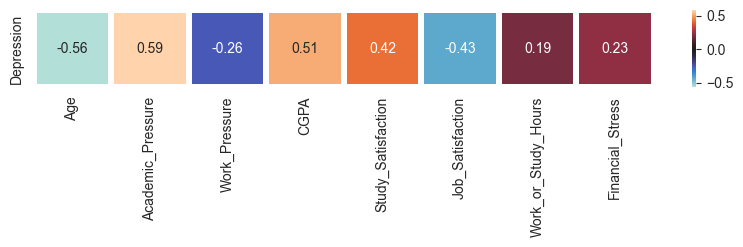

In [27]:
# getting the correlation of each field towards depression (only for numerical data fields)
corr_train = train_3[['Age', 'Academic_Pressure', 'Work_Pressure', 'CGPA', 'Study_Satisfaction', 'Job_Satisfaction', 'Work_or_Study_Hours', 'Financial_Stress', 'Depression']].corr()

corr_depression = pd.DataFrame(corr_train[:-1]['Depression']).transpose()

plt.figure(figsize=(10,1))
sns.heatmap(data=corr_depression, center=0, annot=True, linewidths=3)

In our dataset, the top 3 variables that has connection with depression are:
- `Academic_Pressure`
- `CGPA`
- `Study_Satisfaction`

And the 3 variables with the least relationship towards depression are:
- `Age`
- `Work_Pressure`
- `Job_Satisfaction`

This findings suggests that most people with depression in our dataset are students.

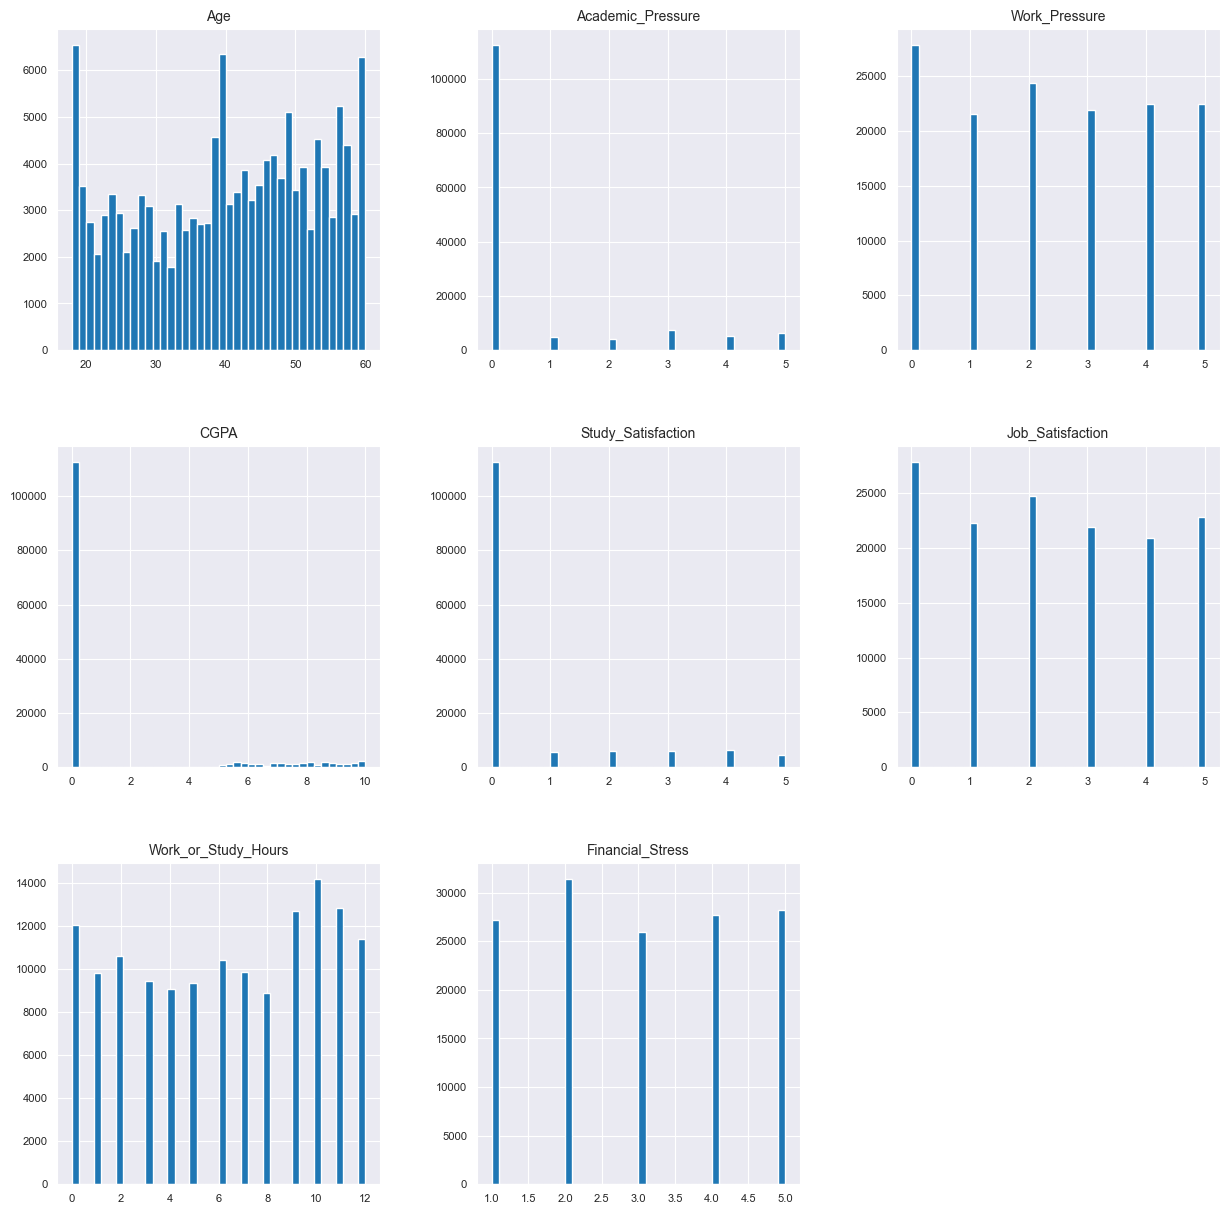

In [28]:
# NUMERICAL COLUMN DISTRIBUTIONS

# Extra code – the next 5 lines define the default font sizes
plt.rc('font', size=10)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

train_3[['Age', 'Academic_Pressure', 'Work_Pressure', 'CGPA', 'Study_Satisfaction', 'Job_Satisfaction', 'Work_or_Study_Hours', 'Financial_Stress']].hist(bins=40, figsize=(15, 15))
plt.show()

The distribution seems to be equally distributed.